# Titanic - Prédiction de survie

## Benjamin Leger 

### Introduction 

L'objectif de ce dossier est de comparer des modèles de machine learning au cours d'un exercice de classification binaire. L'exercice sera exécuté sur le dataset du Titanic avec pour objectif de prédire les passagers qui ont survécus au naufrage. Pour cela j'ai pris le dataset du Titanic que l'on peut trouver en ligne sur la compétition Kaggle à cette addresse : https://www.kaggle.com/competitions/titanic/data.

Sur la base de la matrice de confusion, du score F1, de l'accuracy score et de l'air sous la courbe ROC je choisirai le meilleur modèle possible et le soumettrai sur la compétition Kaggle. Mises à part mes connaissances sur Python, j'ai utilisé pour m'aider des forums tels que Stack Overflow, et je me suis inspiré des méthodes mises en place par d'autres participants à la compétition Kaggle du Titanic en conservant l'indépendance de mon raisonement.

### Sommaire

Après l'import des librairies et des datasets, on procédera selon la méthode CRISP-DM.

1. Import des librairies
2. Import des datasets
3. Analyse exploratoire (Data understanding)
4. Nettoyage et préparation des données (Data preparation)
5. Test et comparaison des modèles (Modeling & Evaluation)
6. Choix du modèle et déploiement (Deployment)

# Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import des datasets

Il y a deux datasets : train and test. Les données de "train" sont les données d'entrainement et représentent 68% des données (891 passagers), la survie des passagers y est étiquetée contrairement aux données de test (32% des données, 418 passagers) où la survie des passagers sera prédite par le modèle.

In [2]:
#Import des csv de train et test 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Aperçu des variables
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


On identifie 12 variables dans ce dataset : 

1. ID du passager
2. Classe du voyage (1ère Classe, 2e Classe, 3e Classe)
3. Nom du passager
4. Sexe du passager
5. Age du passager
6. Nombre de frères ou soeurs du passager
7. Nombre de parents ou d'enfants du passager
8. numéro du ticket
9. Tarif du ticket
10. Numéro de la cabine
11. Ville d'embarquement (S : Southampton, C : Cherbourg, Q : Queenstown)
12. Survie ou non du passager

A noter donc que le dataset de test est identique au niveau des variables excepté pour la survie des passagers qui n'apparait pas car c'est la variable à prédire.

# Analyse exploratoire

l'obectif de cette partie va être de comprendre comment les variables sont interconnectées et comment elles influencent la survie des passagers, il s'agit donc de comprendre quelles variables seront les plus importantes pour le modèle.

### 1. Aperçu du dataset

In [4]:
#aperçu du dataset train
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Il manque plusieurs valeurs pour les variables suivantes : Age, Cabine, et Ville d'embarquement (Embarked). 
Pour la ville d'embarquement il ne manque que 3 valeurs on peut donc les remplacer aisément par le mode (la valeur qui apparaît le plus de fois). Pour l'âge il manque 177 valeurs, il faudra donc trouver un moyen de résoudre ce problème dans la préparation des données. Pour la variable de la cabine, il manque 685 données, il faudra choisir entre la suppression de cette variable ou sa transformation en un booléen en considérant que les valeurs manquantes sont le signe que le passager n'avait pas de cabine. 

Regardons de plus prêt ce que nous apprend ce dataset.

taux de survie :  0.3838383838383838


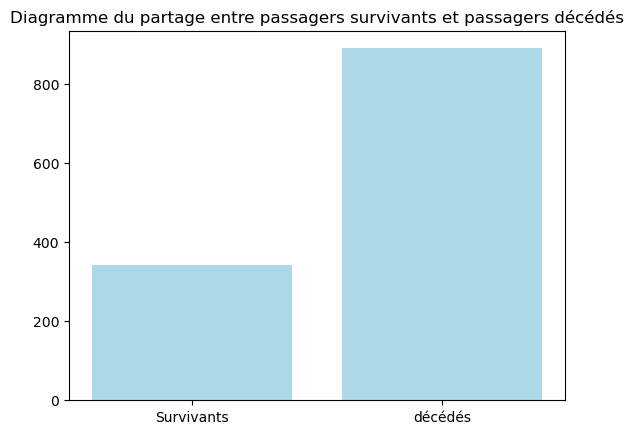

In [5]:
#Isoler la colonne "survived"
Survivants = train["Survived"]

#Diagramme en barre des survivants
a=[sum(Survivants),len(Survivants)]
b=np.arange(2)
plt.bar(b,a, color = 'lightblue')
plt.xticks(b, ['Survivants', 'décédés'])
plt.title('Diagramme du partage entre passagers survivants et passagers décédés')

#Taux de survie
T_survivants = sum(Survivants)/len(Survivants)
print("taux de survie : ",T_survivants)

Un peu moins de 40% des passagers ont survécu au sein du dataset d'entrainement. Quels paramètres peuvent expliquer
qu'un passager a survécu ou non ? Intuitivement on peut penser que l'âge, le sexe et la classe sont très corrélés au taux de survie. Néanmoins d'autres variables peuvent également avoir un rôle. On va vérifier cela en croisant les données : 

1. Taux de survie par sexe
2. Survie selon l'âge
3. Taux de survie par classe
4. Survie selon les proches
5. Taux de survie si cabine
6. Taux de survie selon la ville d'embarquement
7. Survie selon le tarif

# Taux de survie par sexe

Taux de femmes survivantes: 0.7420382165605095
Taux d'hommes survivants: 0.18890814558058924


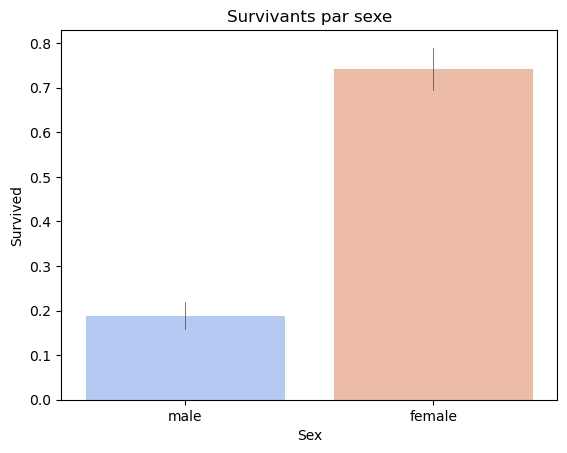

In [6]:
#Diagramme en barre par sex 
sns.barplot(x="Sex", y="Survived", data=train, palette= "coolwarm",errwidth=0.5).set(title='Survivants par sexe')

#affichage des pourcentages
print("Taux de femmes survivantes:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1])
print("Taux d'hommes survivants:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1])

### Interprétation
On constate que les femmes ont un taux de survie très significativement plus élevé que les hommes, 74% des femmes ont survécu contre seulement 19% des hommes. "Les femmes et les enfants d'abord" est une explication intuitive à ce constat. Reste à vérifier si les enfants ont également mieux survécu. 

# Survie selon l'âge

Moyenne d'âge des passagers : 30 ans


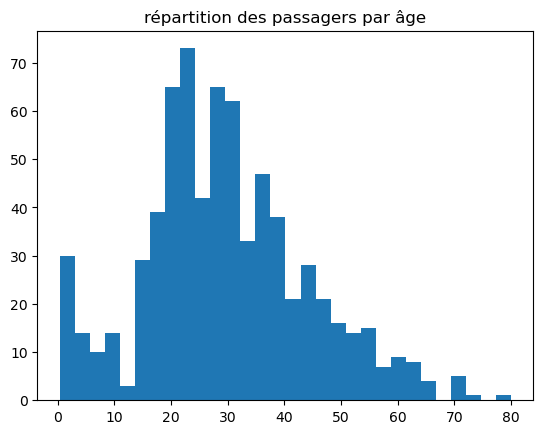

In [7]:
#Afficher un histogramme pour visualiser la répartition des passagers par âge

age = train["Age"]
plt.hist(age, bins = 30)
plt.title("répartition des passagers par âge")

print("Moyenne d'âge des passagers :", round(np.mean(age)), "ans")

Moyenne d'âge des survivants: 28 ans
Moyenne d'âge des décédés: 31 ans


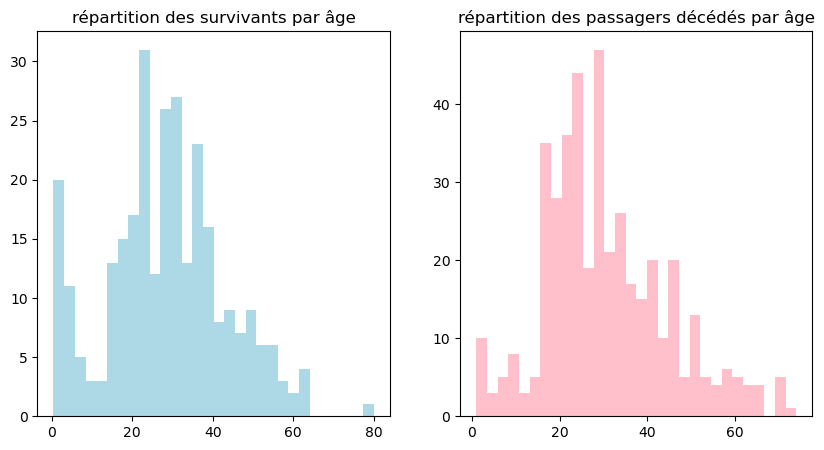

In [8]:
#Comparaison de la répartition des âges en fonction de la survie

survivants_age = train["Age"][train["Survived"] == 1]
morts_age = train["Age"][train["Survived"] == 0]

#Comparaison sur 2 histogrammes côte à côte
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.hist(survivants_age,bins =30, color = "lightblue")
ax1.set_title("répartition des survivants par âge")

ax2.hist(morts_age,bins =30, color = "pink")
ax2.set_title("répartition des passagers décédés par âge")

#Moyenne d'âge selon la survie

print("Moyenne d'âge des survivants:", round(np.mean(survivants_age)), "ans")
print("Moyenne d'âge des décédés:", round(np.mean(morts_age)), "ans")

### Interprétation

Les survivants sont un peu plus jeunes en moyenne que les décédés. C'est dû à une bien meilleure survie des très jeunes enfants. L'adage semble donc se confirmer. Ainsi, on peut supposer que les passagers ayant le mieux survécus sont avant tout des femmes et des jeunes enfants.

# Taux de survie selon la classe

taux de survie en 1ère Classe: 0.6296296296296297
taux de survie en 2eme Classe: 0.47282608695652173
taux de survie en 3eme Classe: 0.24236252545824846


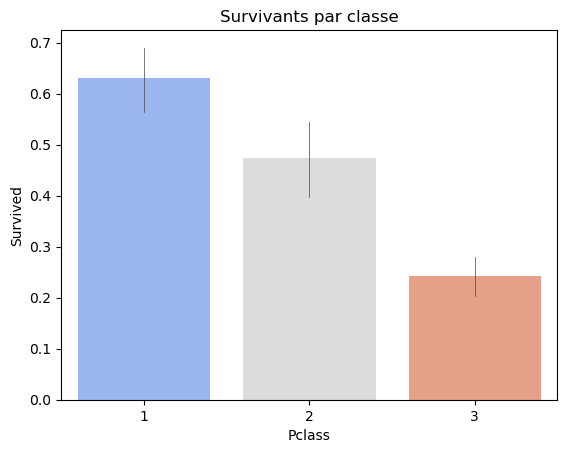

In [9]:
#Afficher le diagramme en barre de survie par classe
sns.barplot(x="Pclass", y="Survived", data=train,palette= "coolwarm",errwidth=0.5).set(title='Survivants par classe')

#Afficher les taux de survie
print("taux de survie en 1ère Classe:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1])

print("taux de survie en 2eme Classe:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1])

print("taux de survie en 3eme Classe:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1])

### Interprétation 

Les passagers qui voyagent en 1ère classe sont près de deux tiers à avoir survécu, ils ont un taux de survie bien supérieur aux passagers en 2e classe (47% de taux survie) et en 3e classe (24% de taux de survie). Intuitivement, on peut penser que les passagers en 3e classe étaient situés proche du fond du navire et des cales, et ont été les premières victimes, contrairement aux passagers de la 1ère classe, plus proches des canaux de sauvetage. Ce critère social semble donc jouer un rôle primordial dans la survie des passagers (ce qui ne manquera pas d'apporter de l'eau au moulin de Karl Marx !).

# Survie selon les proches

Text(0.5, 1.0, 'Survie selon les parents & enfants')

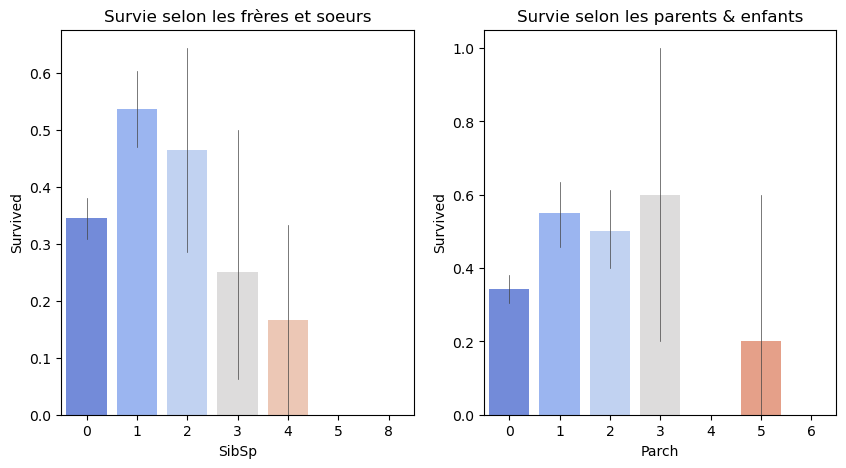

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))

#Afficher le diagramme en barre de survie selon les frères et soeurs
sns.barplot(ax = ax1, x="SibSp", y="Survived", data=train, palette= "coolwarm",errwidth=0.5)
ax1.set_title("Survie selon les frères et soeurs")

#Selon les parents/enfants
sns.barplot(ax = ax2, x="Parch", y="Survived", data=train, palette= "coolwarm",errwidth=0.5)
ax2.set_title("Survie selon les parents & enfants")

### Interprétation 

Les passagers sans frères, soeurs, parents, enfants à bord ont des taux de survie plus faible, être seul(e) semble donc être un handicap pour survivre à un naufrage, probablement car les personnes seules n'avaient personne pour les aider. En revanche avoir de nombreux proches semble être un handicap également : avec plus de 2 fères et soeurs les taux de survie sont moins bons que les passagers seuls, avec 5 enfants & parents également. Cela laisse penser que c'est difficile de survivre lorsqu'on est un grand groupe de passagers. Les chances de survie sont donc plus élevées pour les passagers venus en petits groupes (ce qui ne manquera pas d'apporter de l'eau au moulin de Mancur Olson !).

# Taux de survie en cabine

J'ai décidé de transformer les valeurs de cette variable en booléen, cela m'a semblé être la seule manière d'exploiter cette variable convenablement. Lorsque la cabine n'est pas indiquée j'ai considéré que le passager n'en avait tout simplement pas. J'enregistre cette variable dans une nouvelle colonne 'IsCabine'.

Cette variable peut apporter un biais du fait de ce choix, il sera donc intéressant de voir si les modèles sont plus performants si on la retire.

taux de survie des passagers en cabine : 0.6666666666666666
taux de survie des passagers sans cabine : 0.29985443959243085


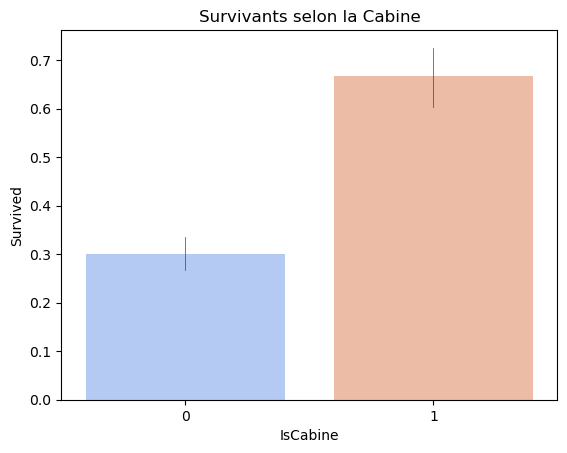

In [11]:
#Créer une colone IsCabine avec un booléen : 1 = cabine, 0 = sans cabine (on en profite pour le faire dans le dataset de test également)
train["IsCabine"] = (train["Cabin"].notnull().astype('int'))
test["IsCabine"] = (test["Cabin"].notnull().astype('int'))

#Taux de survie si cabine
print("taux de survie des passagers en cabine :", train["Survived"][train["IsCabine"] == 1].value_counts(normalize = True)[1])
print("taux de survie des passagers sans cabine :", train["Survived"][train["IsCabine"] == 0].value_counts(normalize = True)[1])

#Diagramme en barre du taux de survie selon la cabine
sns.barplot(x="IsCabine", y="Survived", data=train, palette= "coolwarm",errwidth=0.5).set(title='Survivants selon la Cabine')
plt.show()

### Interprétation 

Les passagers en cabine, plus fortunés, ont mieux survécu. C'est tout à fait cohérent avec l'analyse précédente par classe. Il est d'ailleurs probable que les passagers en cabine étaient pour la plupart en première classe. Vérifions le.

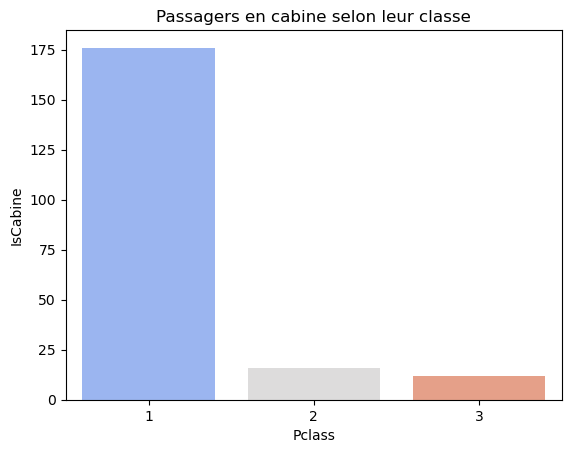

In [12]:
#tableau croisé (La fonctionne somme permet de ne conserver que les cabines = 1)
CabClasse = pd.pivot_table(train, values='IsCabine',index='Pclass', aggfunc= np.sum)
Cab = CabClasse['IsCabine']
sns.barplot(x=CabClasse.index, y=Cab, data = train, palette= "coolwarm").set(title='Passagers en cabine selon leur classe')
plt.show()

### Interprétation 

L'immense majorité des passagers en cabine était également en effet en 1ère Classe. Ainsi le rôle de la cabine dans la survie est davantage lié à la classe qu'à la cabine en elle même. Cette variable pourrait apporter des redondances par la suite il pourra être intéressant de lancer les modèles en la retirant des variables en entrée.

# Survie selon la ville d'embarquement

[Text(0.5, 1.0, "Survivants par ville d'embarquement")]

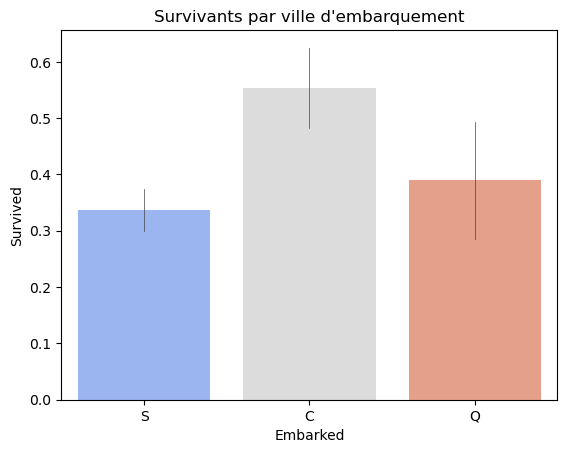

In [13]:
#Afficher le diagramme en barre de survie selon la ville d'embarquement
sns.barplot(x="Embarked", y="Survived", data=train, palette= "coolwarm",errwidth=0.5).set(title="Survivants par ville d'embarquement")


### Interprétation 

Le taux de survie est légèrement plus élevé lorsque l'on embarque à Cherbourg, c'est surement le "french privilege". Ce qui est contre intuitif en revanche c'est que les passagers de Queenstown ont mieux survécu que ceux de Southampton, alors qu'ils étaient pour la plupart des Irlandais sans le sous qui voyageaient en 3e classe pour rejoindre les Etats-Unis. Néanmoins la barre d'erreur du diagramme nous indique une marge d'erreur conséquente, surement à cause du fait que le nombre de passagers ayant embarqué à Queenstone est très faible. Il est donc difficile de conclure quant à une meilleure survie des passagers de Queenstone par rapport à ceux de Southampton.

# Survie selon le tarif payé

Tarif moyen payé par les passagers : 32


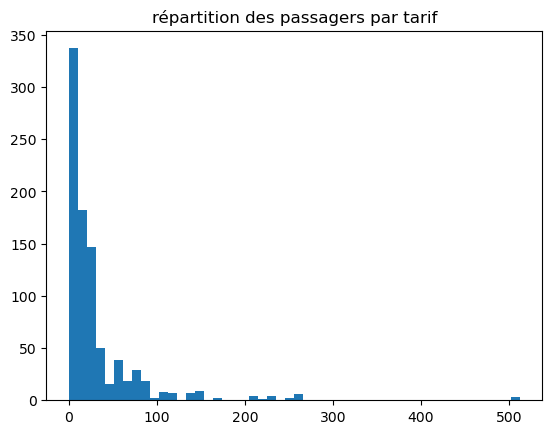

In [14]:
#Afficher un histogramme pour visualiser la répartition des passagers par tarif

tarif = train["Fare"]
plt.hist(tarif, bins = 50)
plt.title("répartition des passagers par tarif")

print("Tarif moyen payé par les passagers :", round(np.mean(tarif)))

Moyenne du tarif payé par les survivants: 48
Moyenne du tarif payé par les décédés: 22
Médiane du tarif payé par les survivants: 26
Médiane du tarif payé par les décédés: 10


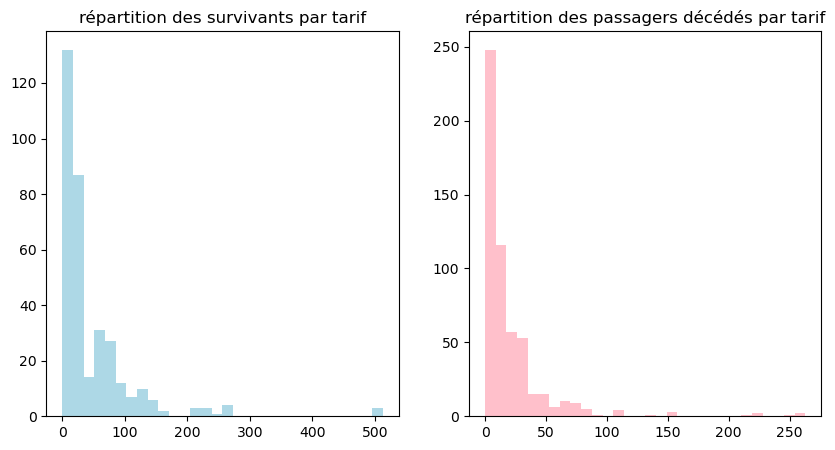

In [15]:
#Comparaison de la répartition du tarif en fonction de la survie

survivants_tarif = train["Fare"][train["Survived"] == 1]
morts_tarif = train["Fare"][train["Survived"] == 0]

#Comparaison sur 2 histogrammes côte à côte
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.hist(survivants_tarif,bins =30, color = "lightblue")
ax1.set_title("répartition des survivants par tarif")

ax2.hist(morts_tarif,bins =30, color = "pink")
ax2.set_title("répartition des passagers décédés par tarif")

#Moyenne et médiane du tarif selon la survie

print("Moyenne du tarif payé par les survivants:", round(np.mean(survivants_tarif)))
print("Moyenne du tarif payé par les décédés:", round(np.mean(morts_tarif)))

print("Médiane du tarif payé par les survivants:", round(np.median(survivants_tarif)))
print("Médiane du tarif payé par les décédés:", round(np.median(morts_tarif)))

## Interprétation 

Il y a une différence assez significative au niveau du tarif : les passagers ayant payé le plus cher ont plus survécu. Cela dit cette variable est très corrélée à la classe que le passager occupe durant son voyage : on imagine aisément que les cabines ou que la première classe sont plus chères que les autres. Il peut donc être pertinent de regarder la corrélation entre ces deux variables.

[[ 1.         -0.54949962]
 [-0.54949962  1.        ]]


Text(0.5, 1.0, 'Nuage de point entre la classe et le tarif payé')

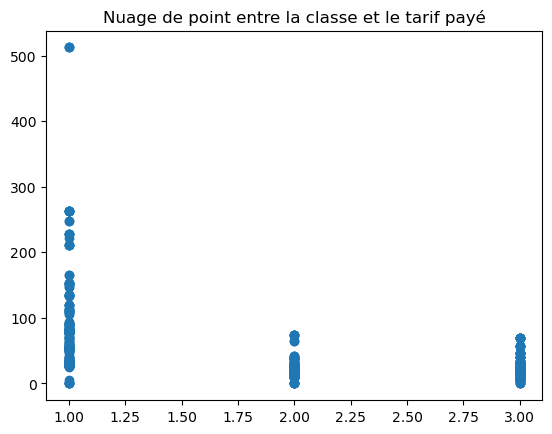

In [16]:
#Vérifions rapidement s'il y a une corrélation entre la classe et le tarif

Coef_Correlation = np.corrcoef(train['Pclass'], train['Fare'])
print(Coef_Correlation)
plt.scatter(train['Pclass'],train['Fare'])
plt.title('Nuage de point entre la classe et le tarif payé')

#### On obeserve bien une corrélation entre la classe et le tartif payé

Il y a donc un coefficient de corrélation assez significatif de près de -0,55 : moins on paye cher, plus on voyage dans des classes de moindre standing (et mal situées sur le bateau). Il pourra être intéressant de voir si les modèles sont meilleurs avec ou sans cette variable qui peut amener de la redondance.

## Conclusion de l'analyse exploratoire

Les variables qui semblent les plus importantes sont le sexe, l'âge et la classe du passager. D'autres variables jouent également un rôle mais il semble plus modèste ou alors ces variables sont très corrélées avec d'autres comme la classe du passager qui est fortement liée au fait d'avoir une cabine ou au fait de payer cher son billet. 

Globalement, le portrait robot du survivant du titanic est une femme relativement jeune, voyageant en première classe avec au moins un proche, qui paye son billet assez cher car elle voyage en cabine. 
A l'inverse le portrait robot du passager n'ayant pas survécu : un homme adulte voyageant sans aucun parent proche et en 3e classe.

Il semblerait donc que la survie de Rose et la mort de Jack ne soit pas une simple coincidence...

# Préparation et nettoyage des données

Maintenant qu'on a analysé le dataset on a une idée plus précise des variables importantes et des variables qui pourront être retirées pour diminuer la redondance. Il faut désormais nettoyer les données que nous avons pour maximiser la performance des modèles que nous allons lancer. 

Il y a deux enjeux principaux : compléter les données manquantes et transformer les valeurs non numériques en valeurs numériques (puis les normaliser). On fera ces opérations sur les deux datasets (train & test).

In [17]:
#On regarde s'il y a des corrections spécifiques au dataset de Test
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsCabine
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,0.000000


Il manque des âges également dans le dataset de test, ainsi des données concernant le tarif (1 seule valeur manquante). Il est évidemment important de nettoyer le dataset de test de la même manière que le dataset de train.

## Cleaning ville d'embarquement

Dans ce cas précis on va remplacer les valeurs manquantes par le mode, car il ne manque que 3 valeurs. 

In [18]:
#On regarde quelle est la ville d'embarquement qui revient le plus

southampton = train[train["Embarked"] == "S"].shape[0]
print("S :", southampton)

cherbourg = train[train["Embarked"] == "C"].shape[0]
print("C :",cherbourg)

queenstown = train[train["Embarked"] == "Q"].shape[0]
print("Q :",queenstown)

S : 644
C : 168
Q : 77


On remplacera donc les 3 valeurs manquantes pour cette variable par Southampton.

In [19]:
# Remplacement des valeurs manquantes par S
train = train.fillna({"Embarked": "S"})

## Cleaning tarif

Idem ici, il ne manque qu'une seule valeur pour le tarif, on la remplace donc par le mode.

In [20]:
import statistics 

In [21]:
#On fait de même pour le tarif dans Test
statistics.mode(test['Fare'])

7.75

On remplace donc la valeur manquante pour cette variable par 7.75

In [22]:
# Remplacement des valeurs manquantes par 7.75
test = test.fillna({"Fare": 7.75})

## Cleaning de l'âge

Compte tenu de l'importance de cette variable et du nombre important de valeurs manquantes dans les deux datasets il faut trouver une stratégie pour remplacer les valeurs manquantes de la manière la plus neutre possible pour ne pas fausser le modèle. Remplacer les âges qui manquent par le mode ou la moyenne des âges est une solution trop simple et risque réduire la précision du modèle par la suite. 

Il existe beaucoup de méthodes pour approximer au mieux les âges manquants. En cherchant je me suis rendu compte qu'il était possible d'extraire les "titres" dans les noms des passagers et d'en déduire leur âge en fonction de l'âge moyen des passagers ayant le même titre. C'est cette solution que nous allons tenter de mettre en place car je la trouve assez élégante et il me semble intuitif que les passagers nommés "Sir" ou "Mrs" auront des âges différents des passagers nommés "Mr" ou "Miss". 

In [23]:
#On travaille sur les deux datasets en même temps
CAge = [train, test]

#on extrait les titres et la moyenne d'âge par titre pour les hommes et les femmes 
for dataset in CAge:
    dataset['Titre'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Titre'],train['Sex'], values= (train['Age']), aggfunc=np.mean)

Sex,female,male
Titre,,
Capt,NaN,70.000000
Col,NaN,58.000000
Countess,33.000000,NaN
Don,NaN,40.000000
Dr,49.000000,40.600000
Jonkheer,NaN,38.000000
Lady,48.000000,NaN
Major,NaN,48.500000
Master,NaN,4.574167


On peut donc remplacer les âges manquants dans les deux datasets par la moyenne des âges des passagers ayant le même titre et le même genre. 

In [24]:
#Dictionnaire des âges moyens correspondants à chaque titre

Map_age_titres = {"Capt": 70, "Col": 58, "Countess": 33, "Don": 40, "Dr": 49, 
                  "Jonkheer": 38,"Lady" : 48, "Major" : 48, "Master" : 5, "Miss" : 22, 
                  "Mlle" : 24, "Mme" : 24, "Mr": 32, "Mrs": 36, "Ms": 28, "Rev" : 43, "Sir" : 49 }

#Remplacement des NaN par 0 pour faire fonctionner la boucle for par la suite

train = train.fillna({"Age": 0})
test = test.fillna({"Age": 0})

#Boucle for pour remplacer chaque valeur manquante par l'âge moyen en fonction du titre du passager dans train

for x in range(len(train["Age"])):
    if train["Age"][x] == 0:
        train["Age"][x] = Map_age_titres[train["Titre"][x]]
        
#Même chose dans test
        
for x in range(len(test["Age"])):
    if test["Age"][x] == 0:
        test["Age"][x] = Map_age_titres[test["Titre"][x]]

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsCabine,Titre
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


On vient donc de remplacer les valeurs manquantes pour l'âge dans les deux dataset. La moyenne d'âge a très peu changé (30,12 ans vs 30,27 ans dans le dataset de test et 29,72 ans vs 29,69 dans le dataset train).

## Préparation des données

Il s'agit de rendre les données intelligibles pour les modèles, on va donc remplacer les valeurs nominales par des valeurs numériques et normaliser les variables.

Au cours de la préparation des données on enlèvera également les variables inutiles qui n'apportent pas d'intérêt pour les modèles, tels que les noms des passagers par exemple.

Nous allons d'abord remplacer les sexes par les valeurs 0 ou 1 (homme ou femme) et les villes d'embarquement par 1,2 ou 3 (S,C,Q) afin de préparer les données pour les modèles.

In [26]:
#On associe chaque sexe à un chiffre
sex_map = {"male": 0, "female": 1}

#On remplace les valeurs dans les datasets

train['Sex'] = train['Sex'].map(sex_map)
test['Sex'] = test['Sex'].map(sex_map)

#idem pour la ville d'embarquement

city_map = {"S": 1, "C": 2, "Q": 3}

train['Embarked'] = train['Embarked'].map(city_map)
test['Embarked'] = test['Embarked'].map(city_map)

## Normalisation 

Nous créons une fonction pour normaliser les variables du dataset afin d'optimiser la performance des modèles. J'ai opté pour une normalisation classique entre 0 et 1.

In [27]:
#On retire les variables non numériques

train = train.drop(['Name', 'Ticket','Cabin','Titre'],axis=1)
test = test.drop(['Name', 'Ticket','Cabin','Titre'],axis=1)

In [28]:
#création de la fonction de normalisation (on normalise entre 0 et 1)

def normalisation (df): 
    result = df.copy()
    for variable in df.columns:
        max_value = df[variable].max()
        min_value = df[variable].min()
        result[variable] = (df[variable] - min_value) / (max_value - min_value)
    return result

#normalisation des données 

train = normalisation(train)
test2 = normalisation(test)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsCabine
0,0.000000,0.0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0
1,0.001124,1.0,0.0,1.0,0.472229,0.125,0.0,0.139136,0.5,1.0
2,0.002247,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0
3,0.003371,1.0,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0,1.0
4,0.004494,0.0,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0


## Conclusion de la préparation des données 

On a désormais un dataset qui contient 8 variables d'entrée exploitables pour les modèles. Les données sont propres et bien préparées de sorte que les modèles peuvent être lancés de manière convenable. 

# Modèles 

#### On importe Sklearn qui va nous servir à faire tourner les modèles.

Pour les paramètres prédicteurs, en prenant en compte l'analyse exploratoire, on choisis les suivants : 

Pclass, Sex,  Age, SibSp, Parch, Fare, IsCabine, Embarked

A noter qu'on pourra relancer les modèles sans 'Fare' et 'IsCabine' pour voir si leurs performances s'améliorent. 

C'est à cette étape qu'on partage le dataset en une partie entrainement et une partie test, j'ai décidé de commencer à 75% d'entrainement et 25% de test. Il est aussi important d'équilibrer les classes pour que les modèles s'entrainent sur des bases correctement échantillonées : il y a 40% de survivants, donc un risque que les modèles sur-estiment les passagers décédés et sous estiment les survivants (ce qui nous donnerait un haut taux de faux négatifs). Sklearn possède un outils pour équilibrer les poids des classes, c'est ce que nous utiliseront.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.utils import class_weight

#Choix des prédicteurs
predictors = train.drop(['PassengerId','Survived'], axis=1)

#Choix de la valeur à prédire
target = train['Survived']

#Partage du dataset entre entrainement (75%) et test (25%)
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

#équilibrage des classes 

class_weights = class_weight.compute_class_weight('balanced', classes=np.array(y_train), y=y_train)


### On effectue un premier test avec un modèle de random forest

J'utilise ce modèle en premier car il donne généralement de boin résultats dans cet exercice. Si sa précision n'est pas satisfaisante j'en tirerais des conclusions et je changerais ma méthode de nettoyage et de préparation des données ou je changerais les prédicteurs.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train,sample_weight=class_weights)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision modèle random forest :", acc_randomforest)

précision modèle random forest : 82.06


[[0.8705036  0.1294964 ]
 [0.26190476 0.73809524]]


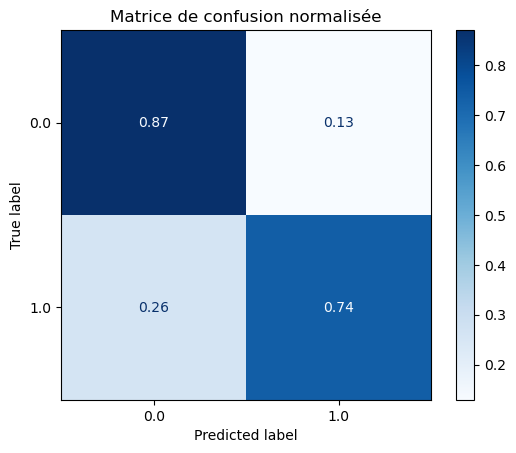

In [31]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        randomforest,
        x_val,
        y_val,
        cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matrice de confusion normalisée")
print(disp.confusion_matrix)

plt.show()

In [32]:
#Affichage du F1-Score

from sklearn.metrics import f1_score
F1_forest = f1_score(y_val, y_pred, average='weighted')


print("F1-Score :", f1_score(y_val, y_pred, average='weighted'))

F1-Score : 0.8197124801130656


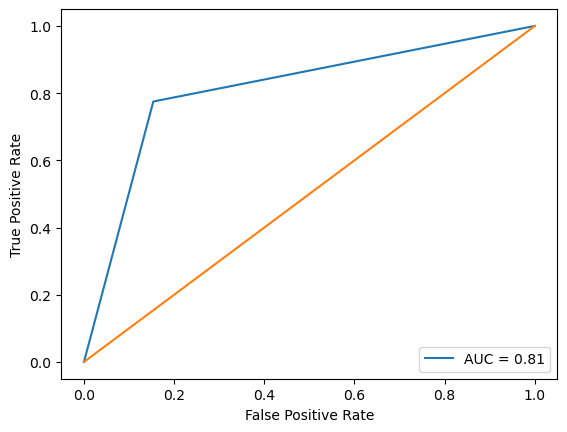

In [33]:
#Affichage de la courbe ROC vs le hasard

hasard = [0,1] 
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_val)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.plot(hasard)
plt.show()

## Interprétation 

Les scores sont plutôt satisfaisants, l'air sous la courbe ROC (AUC) est de 0,81. Le score d'accuracy (proportion de prédictions correctes) est proche de 82% ce qui est plutôt bon. De même on a un score F1 proche de 0,82. La matrice de confusion nous permet de voir que le modèle prédit correctement la survie de 74% des passagers, il y a 26% de faux négatifs, ce qui peut être amélioré. En revanche 87% des passagers décédés ont bien été prédits par le modèle ce qui ne fait que 13% de faux positifs. 

#### En clair le modèle de random forest étudié a tendance à bien prédire les passagers décédés mais n'est pas assez précis pour la prédiction des passagers ayant survécu à cause de trop nombreux faux négatifs.

Pour améliorer les prédictions nous allons faire tourner d'autres modèles et les comparer. Nous conserverons le meilleur sur la bases des métriques que nous avons détaillé. Nous verrons ensuite comment nous pouvons encore améliorer les prédictions. 

### Les modèles

J'ai choisi un total de 6 modèles en comptant la random forest. Ces modèles sont : 

1. Regression Logistique
2. Support Vector Machines (SVM)
3. Arbre de décision
4. Gradient Boost (GB)
5. Extreme Gradient Boost(XGB)
6. Random Forest

In [34]:
# modèle de régression logistique

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train,sample_weight=class_weights)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision modèle régression logistique :", acc_logreg)
F1_RL = f1_score(y_val, y_pred, average='weighted')

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train,sample_weight=class_weights)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision modèle SVM :", acc_svc)
F1_SVM = f1_score(y_val, y_pred, average='weighted')

#Arbre de décision

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train,sample_weight=class_weights)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision de l'abre de décision :", acc_decisiontree)
F1_Tree = f1_score(y_val, y_pred, average='weighted')

# GradientBoost 
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train,sample_weight=class_weights)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision du modele Gboost :",acc_gbk)
F1_GB = f1_score(y_val, y_pred, average='weighted')

#XGBoost

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train,sample_weight=class_weights)
y_pred = xgb_classifier.predict(x_val)
acc_xgb = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision du modele XGboost :",acc_xgb)
F1_XGB = f1_score(y_val, y_pred, average='weighted')

précision modèle régression logistique : 79.82
précision modèle SVM : 78.03
précision de l'abre de décision : 75.34
précision du modele Gboost : 84.75
précision du modele XGboost : 85.2


In [35]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree', 'GBoost', 'XGBoost'],
    'Accuracy_Score': [acc_svc, acc_logreg, 
              acc_randomforest, acc_decisiontree, acc_gbk, acc_xgb],
    'F1_Score':[F1_SVM, F1_RL, 
              F1_forest, F1_Tree,
              F1_GB, F1_XGB]})

models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score,F1_Score
5,XGBoost,85.20,0.851840
4,GBoost,84.75,0.848194
2,Random Forest,82.06,0.819712
1,Logistic Regression,79.82,0.800503
0,Support Vector Machines,78.03,0.780523
3,Decision Tree,75.34,0.751030


Les score F1 sont très corrélés aux accuracy score. On va représenter graphiquement ces accuracy score pour visualiser quels modèles semblent performer le mieux.

Text(0.5, 1.0, 'Comapraison des modèles par accuracy score')

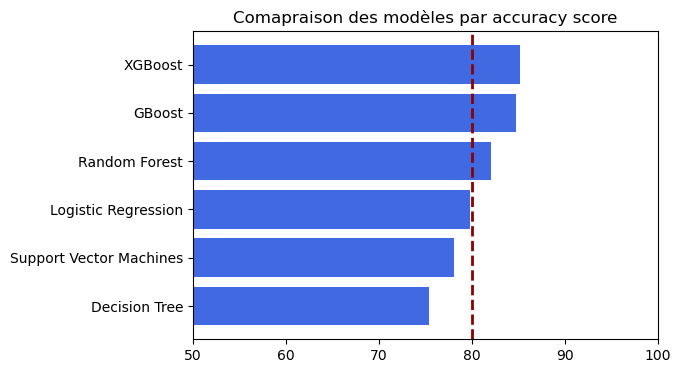

In [36]:
#On représente graphiquement le classement des modèles 

models = models.sort_values('Accuracy_Score')
fig, ax = plt.subplots(figsize = (6,4),dpi=100)
plt.barh(models['Model'],models['Accuracy_Score'], color = 'royalblue')
plt.axvline(80, color='darkred', linestyle='dashed', linewidth=2)
ax.set_xlim([50, 100])
ax.set_title('Comapraison des modèles par accuracy score')

## Interprétation 

Le modèles d'arbre de décision se révèle plutôt décevant. 3 modèles sont au dessus de 80% d'accuracy : le GBoost, le XGBoost, et la Random Forest. On va donc creuser ces 3 modèles pour voir comment il est possible de les améliorer en modifiant les paramètres par exemple. On va aussi relancer les modèles sans les variables 'Fare' et 'Iscabine' pour voir la différence de performance.

In [37]:
#On change les prédicteurs
predictors = train.drop(['PassengerId','Survived','Fare','IsCabine'], axis=1)

#Choix de la valeur à prédire
target = train['Survived']

#Partage du dataset entre entrainement (75%) et test (25%)
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

#équilibrage des classes 

class_weights = class_weight.compute_class_weight('balanced', classes=np.array(y_train), y=y_train)

In [38]:
# modèle de régression logistique

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train,sample_weight=class_weights)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision modèle régression logistique :", acc_logreg)
F1_RL = f1_score(y_val, y_pred, average='weighted')

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train,sample_weight=class_weights)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision modèle SVM :", acc_svc)
F1_SVM = f1_score(y_val, y_pred, average='weighted')

#Arbre de décision

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train,sample_weight=class_weights)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision de l'abre de décision :", acc_decisiontree)
F1_Tree = f1_score(y_val, y_pred, average='weighted')

# GradientBoost 
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train,sample_weight=class_weights)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision du modele Gboost :",acc_gbk)
F1_GB = f1_score(y_val, y_pred, average='weighted')

#XGBoost

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train,sample_weight=class_weights)
y_pred = xgb_classifier.predict(x_val)
acc_xgb = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision du modele XGboost :",acc_xgb)
F1_XGB = f1_score(y_val, y_pred, average='weighted')

#Random Forest

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train,sample_weight=class_weights)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("précision modèle random forest :", acc_randomforest)

précision modèle régression logistique : 78.48
précision modèle SVM : 79.37
précision de l'abre de décision : 76.68
précision du modele Gboost : 81.17
précision du modele XGboost : 80.27
précision modèle random forest : 77.58


In [39]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree', 'GBoost', 'XGBoost'],
    'Accuracy_Score': [acc_svc, acc_logreg, 
              acc_randomforest, acc_decisiontree, acc_gbk, acc_xgb],
    'F1_Score':[F1_SVM, F1_RL, 
              F1_forest, F1_Tree,
              F1_GB, F1_XGB]})

models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score,F1_Score
4,GBoost,81.17,0.812474
5,XGBoost,80.27,0.801684
0,Support Vector Machines,79.37,0.792669
1,Logistic Regression,78.48,0.787325
2,Random Forest,77.58,0.819712
3,Decision Tree,76.68,0.764248


Lorsque l'on retire les variables 'Fare' et 'IsCabine' les perfomances stagnent ou diminuent en fonction des modèles. Ces variables sont donc pertinentes, elles permettent aux modèles de Gradient Boosting, Extreme Gradient Boosting et Random Forest d'afficher des scores plus que satisfaisants, leurs scores sont dégradés en leur absence, nous allons donc les réintégrées dans les modèles.

# Amélioration des modèles sélectionnés

Nous allons modifier les paramètres des 3 modèles qui ont dépassés 80% d'accuracy score pour voir à quel point on peut augmenter leurs performances.

### 1. Gradient Boosting

On fait le choix d'un learning rate plus lent de 0.2, et on paramètre les estimateurs sur 40. On affiche la matrice de confusion, la coubre ROC et les score F1 et accuracy.

[[0.8705036 0.1294964]
 [0.1547619 0.8452381]]


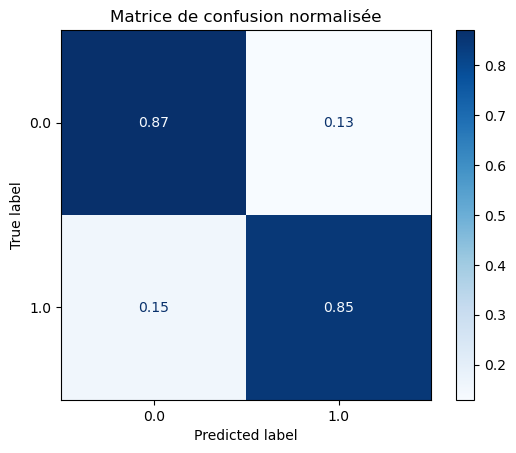

accuracy score : 86.1
F1 score :  0.861722395043632


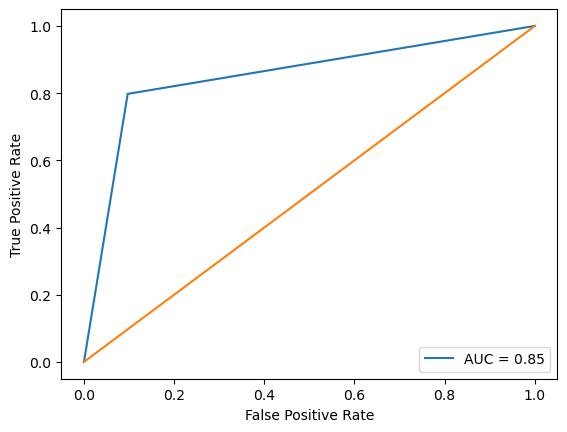

In [40]:
#Choix des prédicteurs
predictors = train.drop(['PassengerId','Survived'], axis=1)

#Choix de la valeur à prédire
target = train["Survived"]

#Partage du dataset entre entrainement (75%) et test (25%)
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

#équilibrage des classes 

class_weights = class_weight.compute_class_weight('balanced', classes=np.array(y_train), y=y_train)


# On relance le modèle en modifiant les paramètres

gbk = GradientBoostingClassifier()
gbk.set_params(learning_rate=0.2, n_estimators=40)

gbk.fit(x_train, y_train,sample_weight=class_weights)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
F1_GB = f1_score(y_val, y_pred, average='weighted')

#Affichage de la matrice de confusion

disp = ConfusionMatrixDisplay.from_estimator(
        gbk,
        x_val,
        y_val,
        cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matrice de confusion normalisée")
print(disp.confusion_matrix)

plt.show()

#Affichage des scores 

print ('accuracy score :',acc_gbk)
print ('F1 score : ', F1_GB)

#Affichage de la courbe ROC
hasard = [0,1] 
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_val)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.plot(hasard)
plt.show()

### 2. Extreme Gradient Boosting

On choisi un learning rate un peu plus rapide que le Gradient Boosting, et on prend 100 estimateurs.

[[0.88489209 0.11510791]
 [0.16666667 0.83333333]]


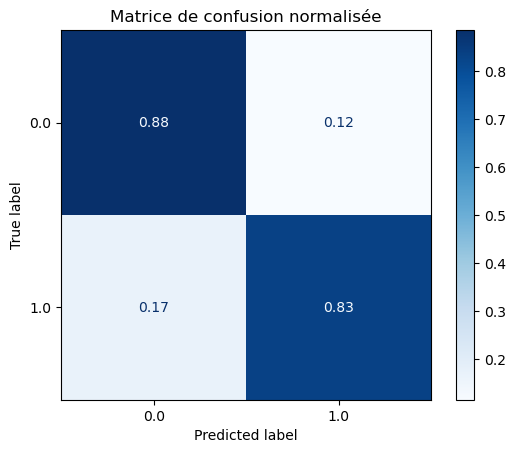

accuracy score : 86.55
F1 score :  0.8657747754980331


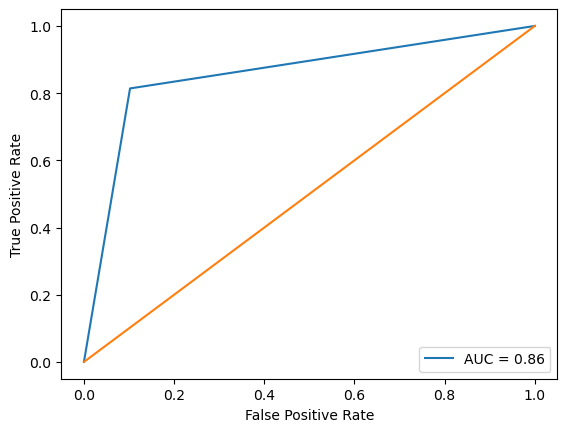

In [41]:
# On relance le modèle
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.set_params(learning_rate=0.1,n_estimators=100)

xgb_classifier.fit(x_train,y_train,sample_weight=class_weights)
y_pred = xgb_classifier.predict(x_val)
acc_xgb = round(accuracy_score(y_pred, y_val) * 100, 2)
F1_XGB = f1_score(y_val, y_pred, average='weighted')

#Affichage de la matrice de confusion

disp = ConfusionMatrixDisplay.from_estimator(
        xgb_classifier,
        x_val,
        y_val,
        cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matrice de confusion normalisée")
print(disp.confusion_matrix)

plt.show()

#Affichage des scores 

print ('accuracy score :',acc_xgb)
print ('F1 score : ', F1_XGB)

#Affichage de la courbe ROC
hasard = [0,1] 
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_val)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.plot(hasard)
plt.show()

### 3. Random Forest

On actionne le bootstrap, on définit la profondeur maximale sur 5 et on prend 100 estimateurs.

[[0.83453237 0.16546763]
 [0.20238095 0.79761905]]


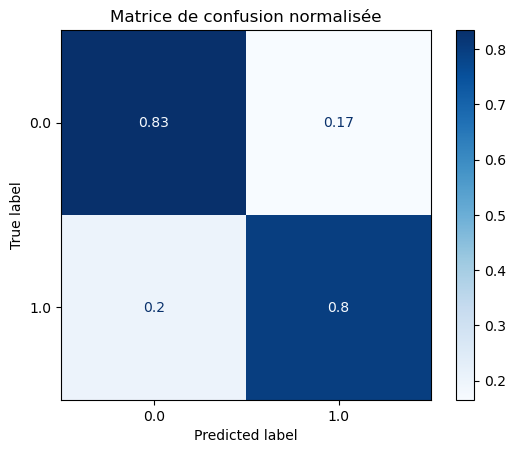

accuracy score : 82.06
F1 score :  0.821742056958859


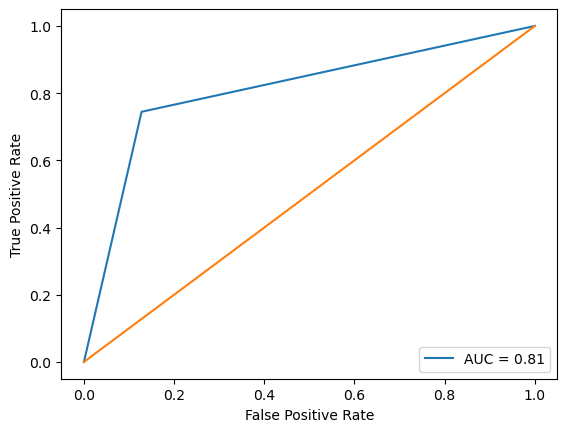

In [42]:
# On relance le modèle

randomforest = RandomForestClassifier()

randomforest.set_params(bootstrap = True, max_depth = 5, n_estimators = 100)

randomforest.fit(x_train,y_train,sample_weight=class_weights)
y_pred = randomforest.predict(x_val)
acc_forest = round(accuracy_score(y_pred, y_val) * 100, 2)
F1_forest = f1_score(y_val, y_pred, average='weighted')

#Affichage de la matrice de confusion

disp = ConfusionMatrixDisplay.from_estimator(
        randomforest,
        x_val,
        y_val,
        cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Matrice de confusion normalisée")
print(disp.confusion_matrix)

plt.show()

#Affichage des scores 

print ('accuracy score :',acc_forest)
print ('F1 score : ', F1_forest)

#Affichage de la courbe ROC
hasard = [0,1] 
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_val)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.plot(hasard)
plt.show()

## Comparaison des modèles après paramétrage

In [43]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'GBoost', 'XGBoost'],
    'Accuracy_Score': [acc_forest, acc_gbk, acc_xgb],
    'F1_Score':[ F1_forest, F1_GB, F1_XGB]})

models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score,F1_Score
2,XGBoost,86.55,0.865775
1,GBoost,86.10,0.861722
0,Random Forest,82.06,0.821742


Text(0.5, 1.0, 'Comparaison des modèles par accuracy score')

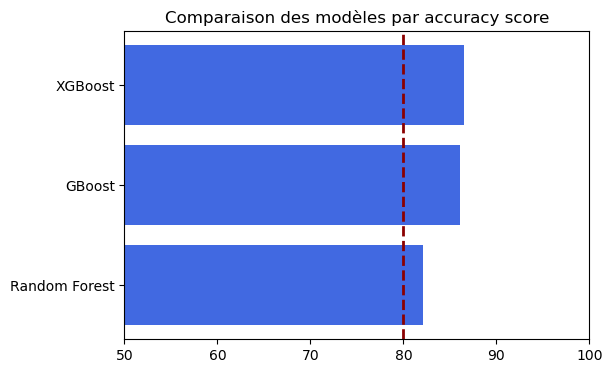

In [44]:
#On représente graphiquement le classement des modèles 

models = models.sort_values('Accuracy_Score')
fig, ax = plt.subplots(figsize = (6,4),dpi=100)
plt.barh(models['Model'],models['Accuracy_Score'], color = 'royalblue')
plt.axvline(80, color='darkred', linestyle='dashed', linewidth=2)
ax.set_xlim([50, 100])
ax.set_title('Comparaison des modèles par accuracy score')

On a amélioré notre XGBoost et notre GBoost, en revanche notre Random Forest a stagné. On devrait donc choisir le XGboost ou le GBoost. 

Sur les critères de l'accuracy score, du score et de l'air sous la courbe ROC, le XGboost est très légèrement meilleur. Néanmoins la matrice de confusion nous montre une tendance du XGboost a moins bien prédire les vrais positifs. Le GBoost est meilleur sur son taux de faux négatif qui est notamment plus faible, mais moins bon sur les faux positifs où son taux est plus élevé. Le choix est difficile, mais compte tenu de la très faible différence au niveau des scores F1 et accuracy, je ne pense pas que disqualifier le Gradient Boosting soit pertinent. Sa matrice de confusion étant plus équilibrée entre vrais positifs et vrais négatifs, je vais considérer le Gradient Boosting comme étant le modèle à sélectionner.

# Conclusion sur le Gradient Boosting

On a un modèle plutôt bon en terme de précision globale. Le taux de faux positif est relativement faible (13%), le modèle n'est donc pas démeusurément optimiste, il prédit rarement à tord la survie des passagers. Le taux de faux négatif est un peu plus élevé, 15% des passagers ayant survécus sont prédit comme décédés. Le score global reste très bon, avec une aire sous la courbe ROC de 0,85, un score F1 de 0,86 également et une précision globale ([vrai positif + vrai négatif]/total des données test) de 86,1%. 

On peut donc essayer ce modèle sur le dataset de test pour prédire la survie des passagers

In [45]:
predictions = gbk.predict(test2.drop('PassengerId', axis=1))

#taux de survie selon le modèle dans le dataset de test

print('taux de survie dans le dataset de test :', sum(predictions)/len(predictions))

taux de survie dans le dataset de test : 0.38516746411483255


#### On a un taux de survie de 38,5% dans le dataset de test contre 38,4% dans le dataset d'entrainement. C'est un taux très proches et donc la prédiction semble acceptable.

# Dataset pour Kaggle

J'exporte un dataset avec les prédictions pour le soumettre à la compétition Kaggle du titanic et obtenir un accuracy score sur cette prédiction effectuée avec le modèle Gradiant Boost.

In [46]:
Passenger_ID = test['PassengerId']
output = pd.DataFrame({'PassengerId' : Passenger_ID, 'Survived': predictions})
output.to_csv('Prediction_BenjaminLeger.csv', index=False)

# Résultat 

Cette prédiction m'a donné un score de 0.779 sur Kaggle, me permettant de me classer 3102e sur 15896 participants au 10 avril 2023. On peut considérer que le modèle mis en place est parmi les 20% des meilleurs modèles de la compétition.